### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#### Load the flower_types dataset and print the first five observations

In [2]:
df = pd.read_csv('flower_types.csv')
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
pd.get_dummies(df['class'],drop_first = True)

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df['sepal width'].isna().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
print('The skewness of sepal length is',df['sepal length'].skew())

The skewness of sepal length is 0.3149109566369728


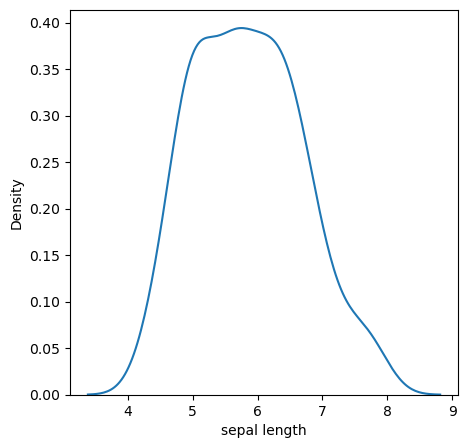

In [6]:
plt.figure(figsize = (5,5))
sns.distplot(df['sepal length'],hist = False)
plt.show()

The above skew value and distribution graph for sepal length depicts normal distribution with absence of skewness.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
print('Unique number of flower species is',df['class'].nunique())

Unique number of flower species is 3


In [8]:
df['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

Frequency encoding does seem to be a better approach to that of one hot encoding as there are 3 unique species under the attribute/variable 'class' but the former fails as the species are equitably distributed across the data. Hence, One-hot encoding serves best in this scenario.

Additional Note: As the number of levels in a variable increases one-hot encoding increases the features drastically.

In [9]:
df = pd.concat([df,pd.get_dummies(df['class'])],axis=1)
df.head(5)

,sepal length,sepal width,petal length,petal width,class,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
print('Minimum of Petal length:',df['petal length'].min())
print('Maximum of Petal length:',df['petal length'].max())

Minimum of Petal length: 1.0
Maximum of Petal length: 6.9


No, it doesn't range from 0 to 1. Hence, applying Min-Max Normalization to bring the data between range 0 and 1.

In [11]:
min_max = MinMaxScaler() 

df['mm_petal_length'] = min_max.fit_transform(df[['petal length']])
print('Minimum of Petal length after Min-Max Normalization:',df['mm_petal_length'].min())
print('Maximum of Petal length after Min-Max Normalization:',df['mm_petal_length'].max())

Minimum of Petal length after Min-Max Normalization: 0.0
Maximum of Petal length after Min-Max Normalization: 1.0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
np.where(df[['sepal length', 'sepal width', 'petal length', 'petal width']].corr()>0.8,True,False)

array([[ True, False,  True,  True],
       [False,  True, False, False],
       [ True, False,  True,  True],
       [ True, False,  True,  True]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

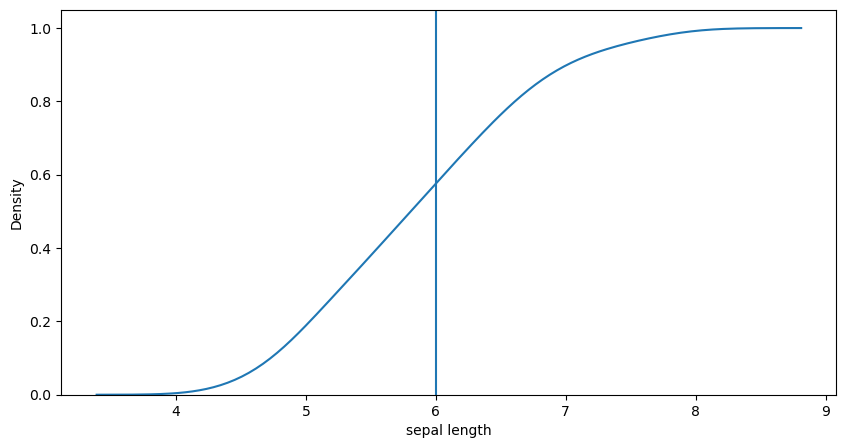

In [13]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['sepal length'],cumulative=True)
plt.axvline(6)
plt.show()

The above cumulative plot highlights that there is 60% chance for sepal length being less than 6cm.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
le = LabelEncoder()

df['le_class'] = le.fit_transform(df['class'])
df.head(5)

,sepal length,sepal width,petal length,petal width,class,setosa,versicolor,virginica,mm_petal_length,le_class
0,5.1,3.5,1.4,0.2,setosa,1,0,0,0.067797,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0,0.067797,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0,0.050847,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0,0.084746,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0,0.067797,0


In [15]:
pd.DataFrame(df.groupby('class')['le_class'].unique())

,le_class
class,
setosa,[0]
versicolor,[1]
virginica,[2]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

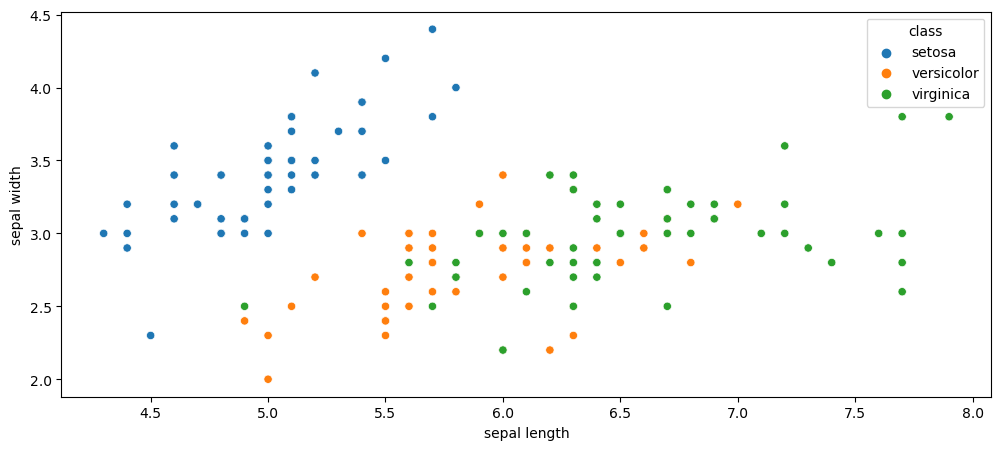

In [16]:
plt.figure(figsize = (12,5))
sns.scatterplot(data=df,x='sepal length',y='sepal width',hue='class')
plt.show()

For Setosa, as sepal length increases its width also increases. Virginica has larger sepal length but for majority elements their sepal width is less than 3.5cm. The datapoints for Versicolor is populated mostly between sepal length of 5 to 7cm and width less than 3.5cm. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='class', ylabel='sepal length'>

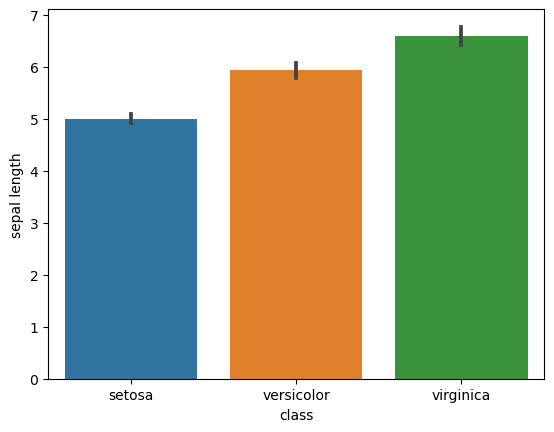

In [17]:
sns.barplot(data = df, x='class', y='sepal length')

Virginica has higher sepal length followed by Versicolor and Setosa.

##### Extras

<BarContainer object of 150 artists>

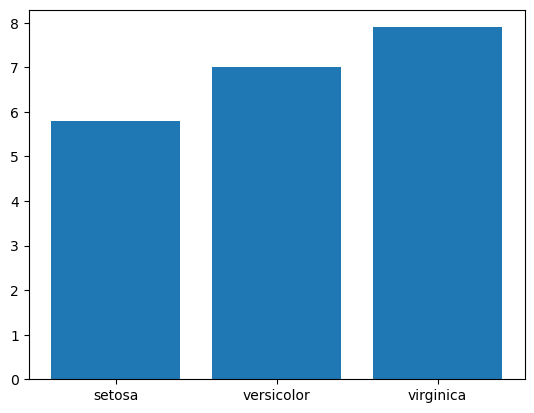

In [18]:
# Matplotlib.pyplot
plt.bar(data=df, x='class',height='sepal length')

In [19]:
df.groupby('class')['sepal length'].mean() # Matches to the sns.barplot above

class
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal length, dtype: float64

In [20]:
df.groupby('class')['sepal length'].max() # Matches to plt.bar above

class
setosa        5.8
versicolor    7.0
virginica     7.9
Name: sepal length, dtype: float64

##### Add On -  Note: By default sns.barplot computes and plots mean whereas plt.bar plots max of the numerical variable.